In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
path = './dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv'
dataset = pd.read_csv(path)

In [4]:
dataset['sigma'] = np.sqrt(dataset['sigma_vx']**2 + dataset['sigma_vy']**2 + dataset['sigma_vz']**2)
dataset.to_csv('dataset.csv')

In [5]:
dataset['t(Gyr)'] = dataset['t(Myr)[col2]']*1e-9
dataset.to_csv('dataset.csv')

In [6]:
infalls = []
for time in dataset['t(Gyr)']:
    if time <= 0:
        infalls.append('first')
    elif 0 <  time <= 3.63:
        infalls.append('recent')
    elif 3.63 < time <= 6.45:
        infalls.append('intermediate')
    elif 6.45 <   time:
        infalls.append('ancient')

dataset['infalling'] = infalls       

In [7]:
dataset.to_csv('dataset.csv')

In [8]:
dataset_gID = dataset.groupby('GroupID')

In [9]:
max(dataset['GroupSize'])

242

In [15]:
dataset['GroupID'].loc[dataset['GroupSize'] == 242]

11923    611
11924    611
11925    611
11926    611
11927    611
        ... 
12160    611
12161    611
12162    611
12163    611
12164    611
Name: GroupID, Length: 242, dtype: int64

In [16]:
group = dataset_gID.get_group(611)

C:\Users\haleh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


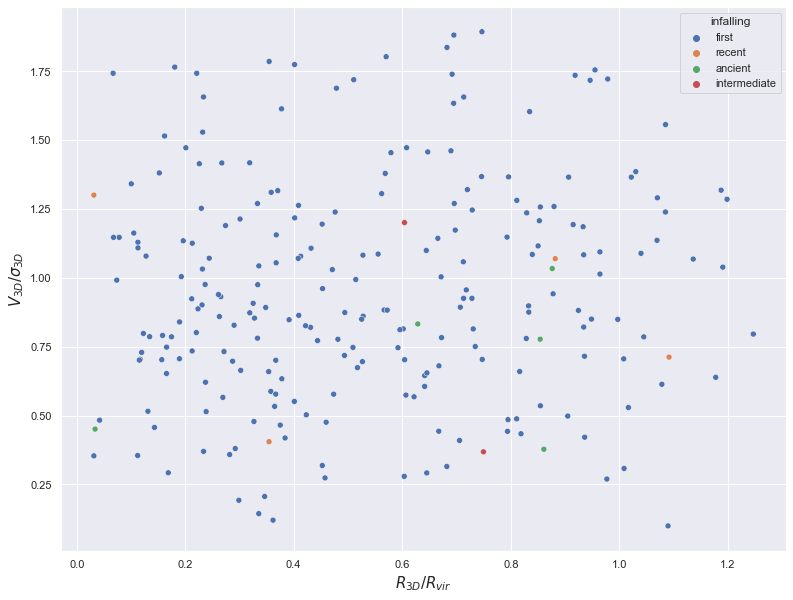

In [17]:
x = group['offset']
y = group['velgal']/group['sigma']

# colors = {'first':"blue", 'recent':"green", 'intermediate':"orange", 'ancient':"red"}

df = pd.DataFrame(dict(x = x, y = y, infalling = group['infalling']))
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.scatterplot('x', 'y', data=df, hue='infalling')
ax.set_xlabel("$R_{3D} / R_{vir}$", fontsize = 15)
ax.set_ylabel("$V_{3D} / \sigma_{3D}$", fontsize = 15)

plt.show()

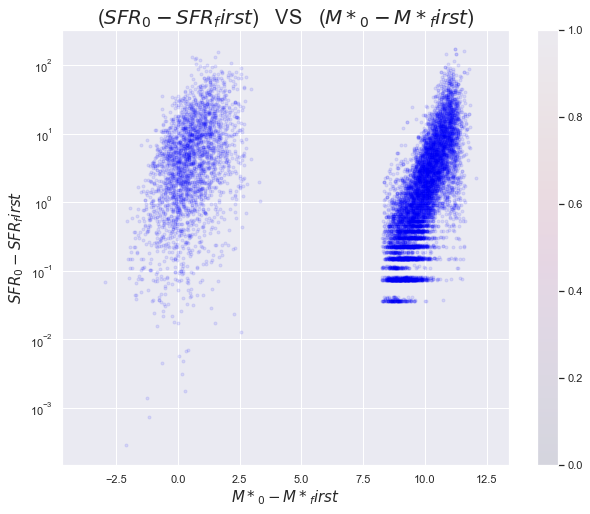

In [70]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x1 = dataset['M*_first[col25]']
x2 = dataset['M*_0[col10]']

x = x2-x1
y = y2-y1

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0] 
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0] 

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.colorbar()

Text(0, 0.5, 'Mh_first')

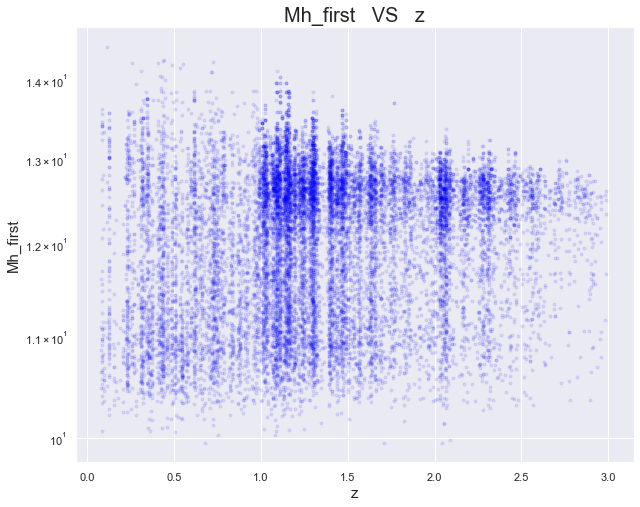

In [111]:
y = dataset['Mh_first[col24]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_0 - M*_first')

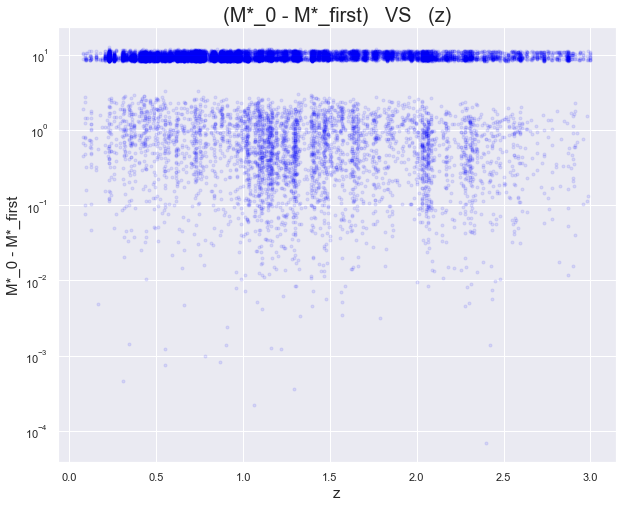

In [78]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['z[4]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0.5, 0, 't(Myr)')

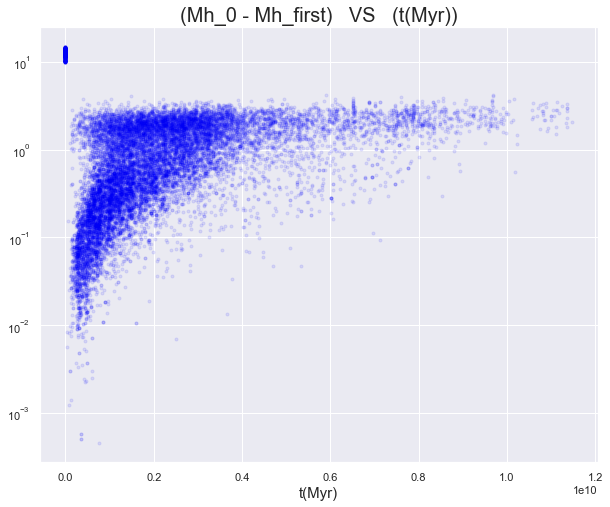

In [95]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x = dataset['t(Myr)[col2]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha = 0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

What is limitation? When quenching occures?

Text(0, 0.5, 'SFR_0 - SFR_first')

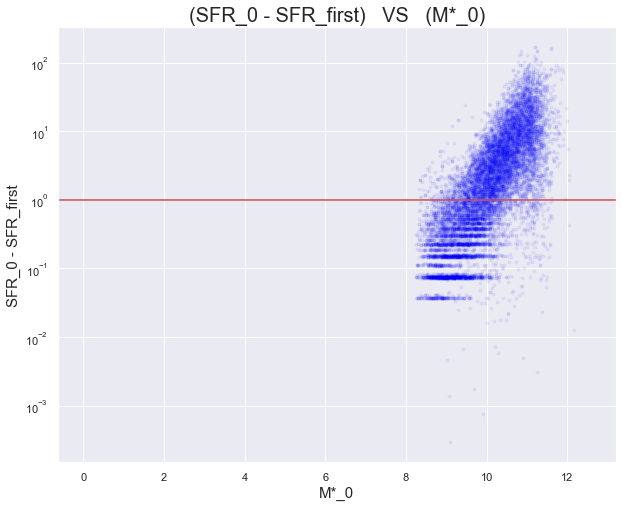

In [94]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_0[col10]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.05)
plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)